In [104]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

# just refreshing

In [105]:
numpy_file_car0= np.load("/Users/hesham/Desktop/NU_Master/Computer_vision/lec4/assignment1_partI/partI/nosol/gt/Cars0.npy",allow_pickle=True)

In [106]:
numpy_file_car0.item()

{'points': array([[227, 128],
        [420, 121],
        [418, 165],
        [231, 181]]),
 'homography': array([[ 6.34096120e-01, -4.78563110e-02, -1.37814212e+02],
        [ 2.66869458e-02,  7.35797220e-01, -1.00239981e+02],
        [-7.34507348e-04, -4.32755770e-04,  1.00000000e+00]])}

In [107]:
image=cv2.imread("/Users/hesham/Desktop/NU_Master/Computer_vision/lec4/assignment1_partI/partI/nosol/images/Cars0.png")

(268, 500, 3)

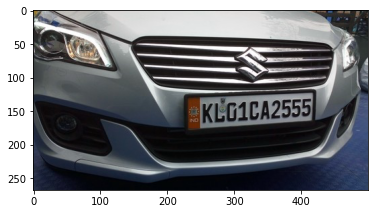

In [108]:
plt.imshow(image)
image.shape

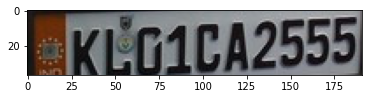

In [109]:
plt.imshow(image[128: 165, 227: 418])

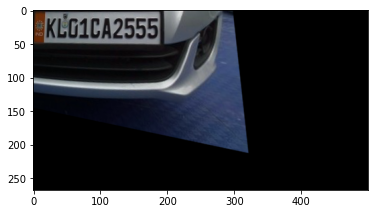

In [110]:
out=image[128: 165, 227: 418].shape

wrapped= cv2.warpPerspective(image, (numpy_file_car0.item()['homography']), (image.shape[1],image.shape[0]))
plt.imshow(wrapped)

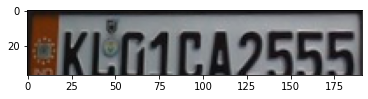

In [111]:
out=image[128: 165, 227: 418].shape

wrapped= cv2.warpPerspective(image, (numpy_file_car0.item()['homography']), (out[1],out[0]))
plt.imshow(wrapped)

In [132]:
out_image=image[128: 165, 227: 418]
out_image.shape

(37, 191, 3)

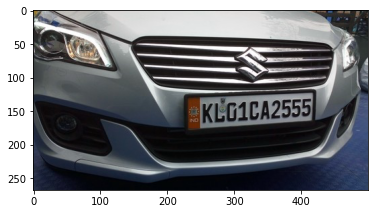

In [169]:
plt.imshow(image)

In [168]:
p1

array([[227, 128],
       [420, 121],
       [418, 165],
       [231, 181]])

array([[  0,   0],
       [191,   0],
       [191,  37],
       [  0,  37]])

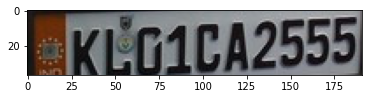

In [171]:
plt.imshow(out_image)
p2=np.array([[0,0],
                    [out_image.shape[1],0],
                    [out_image.shape[1],out_image.shape[0]],
                   [0,out_image.shape[0]]])
p2

In [258]:
p1=numpy_file_car0.item()['points']


A = []
for i in range(0, len(p1)):
    x, y = p1[i][0], p1[i][1]
    u, v = p2[i][0], p2[i][1]
    A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
    A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
A = np.asarray(A)
U, S, V = np.linalg.svd(A)
L = V[-1,:] / Vh[-1,-1]
H = L.reshape(3, 3)

In [260]:
out_final=cv2.warpPerspective(image, (H), (out[1],out[0]))


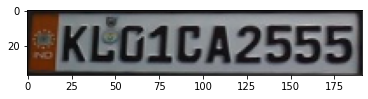

In [261]:
plt.imshow(out_final)

# Normalized_DLT

In [252]:
#this part is implementation of algorithm in Andrew Zisserman book

image1= p1
image2= p2

In [253]:
def get_average_dist_to_origin(points):
    dist = (points - [0,0])**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)

    return np.mean(dist)



def normalize_image_points(image):
    """
    Input: 2D list with x,y image points
    Output:
    """

    
    print("Normalizing data using similarity matrix...")

    image = np.array(image)
    mean, std = np.mean(image, 0), np.std(image)

    # define similarity transformation
    # no rotation, scaling using sdv and setting centroid as origin
    Transformation = np.array([[std/np.sqrt(2), 0, mean[0]],
                               [0, std/np.sqrt(2), mean[1]],
                               [0,   0, 1]])

    # apply transformation on data points
    Transformation = np.linalg.inv(Transformation)
    image = np.dot(Transformation, np.concatenate((image.T, np.ones((1, image.shape[0])))))

    # retrieve normalized image in the original input shape (25, 2)
    image = image[0:2].T

    print("translated origin:", np.mean(image, axis=0))
    print("average distance to origin:", get_average_dist_to_origin(image))

    return image, Transformation

def compute_matrix_A(points1, points2, no_points):
    """
    Input: Normalized correspondences for image1 and image2
    Output: Matrix A as defined in Zisserman p. 91
    """

    A = []

    for i in range(0, no_points):
        x, y = points1[i, 0], points1[i, 1]
        x_prime, y_prime = points2[i, 0], points2[i, 1]

        # create A_i according to the eq. in the book
        # here we are assuming w_i is one
        A.append([0, 0, 0, -x, -y, -1, y_prime*x, y_prime*y, y_prime])
        A.append([x, y, 1, 0, 0, 0, -x_prime*x, -x_prime*y, -x_prime])

    print()
    print("Stacked matrix A shape:", np.shape(A))

    return np.asarray(A)

def compute_SVD(matrix_A):
    print()
    print("Computing SVD...")

    return np.linalg.svd(matrix_A)

def get_vector_h(matrix_V):
    """
    Input: Matrix V from SVD of A
    Output: Unitary vector h (last column of V matrix of SVD)
    """
    print()
    print("Obtaining vector h...")

    h = matrix_V[-1,:] / matrix_V[-1,-1]

    return h

In [264]:
image1 = np.array(image1)
image2 = np.array(image2)
no_points = image1.shape[0]
image1_normalized, T = normalize_image_points(image1)
image2_normalized, T_prime = normalize_image_points(image2)

    # get matrix A for each normalized correspondence (dims 2*n x 9)
A = compute_matrix_A(image1_normalized, image2_normalized, no_points)

    # compute SVD of A
U, S, V = compute_SVD(A)

    # get last column of V and normalize it (this is the vector h)
h = get_vector_h(V)

    # obtain homography (H tilde)

print("Reshaping to get homography H_tilde...")
H_tilde = h.reshape(3,3)
H = np.dot(np.dot(np.linalg.pinv(T_prime), H_tilde), T)


Normalizing data using similarity matrix...
translated origin: [3.33066907e-16 5.55111512e-17]
average distance to origin: 1.2423761012072643
Normalizing data using similarity matrix...
translated origin: [0. 0.]
average distance to origin: 1.745218438593489

Stacked matrix A shape: (8, 9)

Computing SVD...

Obtaining vector h...
Reshaping to get homography H_tilde...


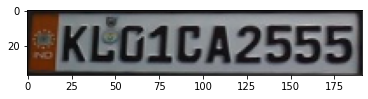

In [266]:
out_final2=cv2.warpPerspective(image, (H), (out[1],out[0]))

plt.imshow(out_final2)

# validation

In [274]:
def dlt(image, points):
    
    x1=points[0][1]
    x3=points[2][1]
    y1=points[0][0]
    y3=points[2][0]
    
    object1= image[x1:x3,y1:y3]
    
    p1=points
    p2=np.array([[0,0],
                    [object1.shape[1],0],
                    [object1.shape[1],object1.shape[0]],
                   [0,object1.shape[0]]])
    
    
    #A = []
    #for i in range(0, len(p1)):
        #x, y = p1[i][0], p1[i][1]
        #u, v = p2[i][0], p2[i][1]
        #A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
        #A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
    #A = np.asarray(A)
    #U, S, V = np.linalg.svd(A)
    #L = V[-1,:] / Vh[-1,-1]
    #H = L.reshape(3, 3)
    
    
    
    #now normalized DLT
    image1 = np.array(p1)
    image2 = np.array(p2)
    no_points = image1.shape[0]
    image1_normalized, T = normalize_image_points(image1)
    image2_normalized, T_prime = normalize_image_points(image2)

        # get matrix A for each normalized correspondence (dims 2*n x 9)
    A = compute_matrix_A(image1_normalized, image2_normalized, no_points)

        # compute SVD of A
    U, S, V = compute_SVD(A)

        # get last column of V and normalize it (this is the vector h)
    h = get_vector_h(V)

        # obtain homography (H tilde)

    print("Reshaping to get homography H_tilde...")
    H_tilde = h.reshape(3,3)
    H = np.dot(np.dot(np.linalg.pinv(T_prime), H_tilde), T)
    
    return H

    

    
    
    

# compute Mean squared error

In [275]:
import os
import numpy as np
import argparse




def main():
    #ap = argparse.ArgumentParser()
    #ap.add_argument("-i", "--srcdir", help = "/Users/hesham/Desktop/NU_Master/Computer_vision/lec4/assignment1_partI/partI/nosol/")
    #ap.add_argument("-n", "--gtdir", help = "path to npy groundtruth directory")
    #ap.add_argument("--norm", action="store_true")
    #args = ap.parse_args()
    srcdir= "/Users/hesham/Desktop/NU_Master/Computer_vision/lec4/assignment1_partI/partI/nosol/images/"
    gtdir= "/Users/hesham/Desktop/NU_Master/Computer_vision/lec4/assignment1_partI/partI/nosol/gt/"
    error = 0
    files = os.listdir(srcdir)
    for image_path in files:
        image = cv2.imread(os.path.join(srcdir, image_path))
        npy_file = os.path.join(gtdir, image_path.split('/')[-1].replace('png', 'npy'))

        gt = np.load(npy_file, allow_pickle=True).item()
        points = gt['points']
        homography_gt = gt['homography']

        # TODO: Call your DLT methods according to norm flag
        homography = dlt(image,points)

        error += np.linalg.norm(homography.flatten() - homography_gt.flatten())**2

    print('Total Mean Squared Error: ', error/len(files))

if __name__ == "__main__":
    main()

Normalizing data using similarity matrix...
translated origin: [2.22044605e-16 2.22044605e-16]
average distance to origin: 1.641193995090192
Normalizing data using similarity matrix...
translated origin: [0. 0.]
average distance to origin: 1.7847525850921053

Stacked matrix A shape: (8, 9)

Computing SVD...

Obtaining vector h...
Reshaping to get homography H_tilde...
Normalizing data using similarity matrix...
translated origin: [-4.4408921e-16  4.4408921e-16]
average distance to origin: 0.861797014164691
Normalizing data using similarity matrix...
translated origin: [0. 0.]
average distance to origin: 1.8910796219626635

Stacked matrix A shape: (8, 9)

Computing SVD...

Obtaining vector h...
Reshaping to get homography H_tilde...
Normalizing data using similarity matrix...
translated origin: [3.33066907e-16 5.55111512e-17]
average distance to origin: 1.2423761012072643
Normalizing data using similarity matrix...
translated origin: [0. 0.]
average distance to origin: 1.745218438593489